## Real Estate (99acres.com) Price Analysis

## 1. Import Libraries

In [3]:
import folium
import numpy as np
import pandas as pd
import seaborn as sns
from collections import Counter
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
from geopy.geocoders import ArcGIS

import warnings
warnings.filterwarnings('ignore')

## 2. Load the Dataset

In [4]:
mum_prop = pd.read_csv('Datasets/Mumbai_Property.csv')

### 2.1 Know more about dataset

In [5]:
mum_prop.head()

,Property_Name,Location,Region,Property_Age,Availability,Area_Tpye,Area_SqFt,Rate_SqFt,Floor_No,Bedroom,Bathroom,Price_Lakh
0,Omkar Alta Monte,W E Highway Malad East Mumbai,Malad Mumbai,0 to 1 Year,Ready To Move,Super Built Up Area,2900.0,17241,14,3,4,500.0
1,T Bhimjyani Neelkanth Woods,Manpada Thane Mumbai,Manpada Thane,1 to 5 Year,Ready To Move,Super Built Up Area,1900.0,12631,8,3,3,240.0
2,Legend 1 Pramila Nagar,Dahisar West Mumbai,Dahisar Mumbai,10+ Year,Ready To Move,Super Built Up Area,595.0,15966,3,1,2,95.0
3,Unnamed Property,Vidyavihar West Vidyavihar West Central Mumbai...,Central Mumbai,5 to 10 Year,Ready To Move,Built Up Area,1450.0,25862,1,3,3,375.0
4,Unnamed Property,176 Cst Road Kalina Mumbai 400098 Santacruz Ea...,Santacruz Mumbai,5 to 10 Year,Ready To Move,Carpet Area,876.0,39954,5,2,2,350.0


In [6]:
mum_prop.shape

(2580, 12)

In [7]:
mum_prop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2580 entries, 0 to 2579
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Property_Name  2580 non-null   object 
 1   Location       2580 non-null   object 
 2   Region         2580 non-null   object 
 3   Property_Age   2580 non-null   object 
 4   Availability   2580 non-null   object 
 5   Area_Tpye      2580 non-null   object 
 6   Area_SqFt      2580 non-null   float64
 7   Rate_SqFt      2580 non-null   int64  
 8   Floor_No       2580 non-null   int64  
 9   Bedroom        2580 non-null   int64  
 10  Bathroom       2580 non-null   int64  
 11  Price_Lakh     2580 non-null   float64
dtypes: float64(2), int64(4), object(6)
memory usage: 242.0+ KB


In [8]:
mum_prop.Availability.value_counts()

Availability
Ready To Move         2565
Under Construction      15
Name: count, dtype: int64

In [9]:
mum_prop.Region.value_counts().head(20)

Region
Central Mumbai               225
Mira Road                    201
Kharghar Navi-Mumbai         196
Thane                        192
Ulwe Navi-Mumbai             174
Mumbai Harbour               104
South Mumbai                  98
Dombivli Thane                85
Hiranandani Thane             79
Ghansoli Navi-Mumbai          76
Kamothe Navi-Mumbai           64
Kandivali Mumbai              62
Panvel Navi-Mumbai            61
Malad Mumbai                  59
Kalyan Thane                  58
Andheri Mumbai                46
Taloja Navi-Mumbai            44
Manpada Thane                 42
Koparkhairane Navi-Mumbai     39
Dahisar Mumbai                33
Name: count, dtype: int64

In [10]:
mum_prop.Region.nunique()

145

In [11]:
mum_prop.describe().round(2)

,Area_SqFt,Rate_SqFt,Floor_No,Bedroom,Bathroom,Price_Lakh
count,2580.00,2580.00,2580.00,2580.00,2580.00,2580.00
mean,1026.11,19111.85,8.84,1.96,2.07,174.39
std,2287.13,40760.88,8.10,0.84,0.75,369.48
min,33.57,84.00,-1.00,1.00,1.00,13.00
25%,630.75,8791.75,3.00,1.00,2.00,67.00
50%,850.00,13785.00,6.00,2.00,2.00,111.50
75%,1156.00,22650.00,12.00,2.00,2.00,200.00
max,100000.00,1650000.00,59.00,6.00,7.00,16500.00


In [12]:
Q1 = np.quantile(mum_prop.Area_SqFt,0.02)
Q3 = np.quantile(mum_prop.Area_SqFt,0.98)
med = np.median(mum_prop.Area_SqFt)
IQR = Q3 - Q1
upper_bound = Q3+(1.5*IQR)
lower_bound = Q1-(1.5*IQR)
outliers1 = mum_prop.Area_SqFt[(mum_prop.Area_SqFt <= lower_bound) | (mum_prop.Area_SqFt >= upper_bound)]

mum_prop = mum_prop.drop(outliers1.index).reset_index(drop=True)

In [13]:
Q1 = np.quantile(mum_prop.Rate_SqFt,0.02)
Q3 = np.quantile(mum_prop.Rate_SqFt,0.80)
med = np.median(mum_prop.Rate_SqFt)
IQR = Q3 - Q1
upper_bound = Q3+(1.5*IQR)
lower_bound = Q1-(1.5*IQR)
outliers1 = mum_prop.Rate_SqFt[(mum_prop.Rate_SqFt <= lower_bound) | (mum_prop.Rate_SqFt >= upper_bound)]

mum_prop = mum_prop.drop(outliers1.index).reset_index(drop=True)

In [14]:
mum_prop.describe().round(2)

,Area_SqFt,Rate_SqFt,Floor_No,Bedroom,Bathroom,Price_Lakh
count,2538.00,2538.00,2538.00,2538.00,2538.00,2538.00
mean,948.95,16546.14,8.79,1.95,2.05,161.27
std,486.53,10192.02,7.98,0.83,0.73,162.12
min,185.00,1808.00,-1.00,1.00,1.00,13.00
25%,634.25,8762.25,3.00,1.00,2.00,66.25
50%,850.00,13629.50,6.00,2.00,2.00,110.00
75%,1150.00,22278.75,12.00,2.00,2.00,196.75
max,5000.00,55611.00,55.00,6.00,7.00,1900.00


In [16]:
mum_prop.duplicated().sum()

np.int64(7)

In [17]:
mum_prop = mum_prop.drop_duplicates(ignore_index=True)

In [18]:
mum_prop.isna().sum()

Property_Name    0
Location         0
Region           0
Property_Age     0
Availability     0
Area_Tpye        0
Area_SqFt        0
Rate_SqFt        0
Floor_No         0
Bedroom          0
Bathroom         0
Price_Lakh       0
dtype: int64

In [19]:
mum_prop.shape

(2531, 12)

In [ ]:
mum_prop.to_csv('Final_Project.csv', index_label = False)
mum_prop = pd.read_csv('Final_Project.csv')

## 3. Data Visualization

### 3.1 Set the rcParams for all next Visualization

In [21]:
rcParams = {'xtick.labelsize':'14','ytick.labelsize':'14','axes.labelsize':'16'}

### 3.2 Hunting Outliers

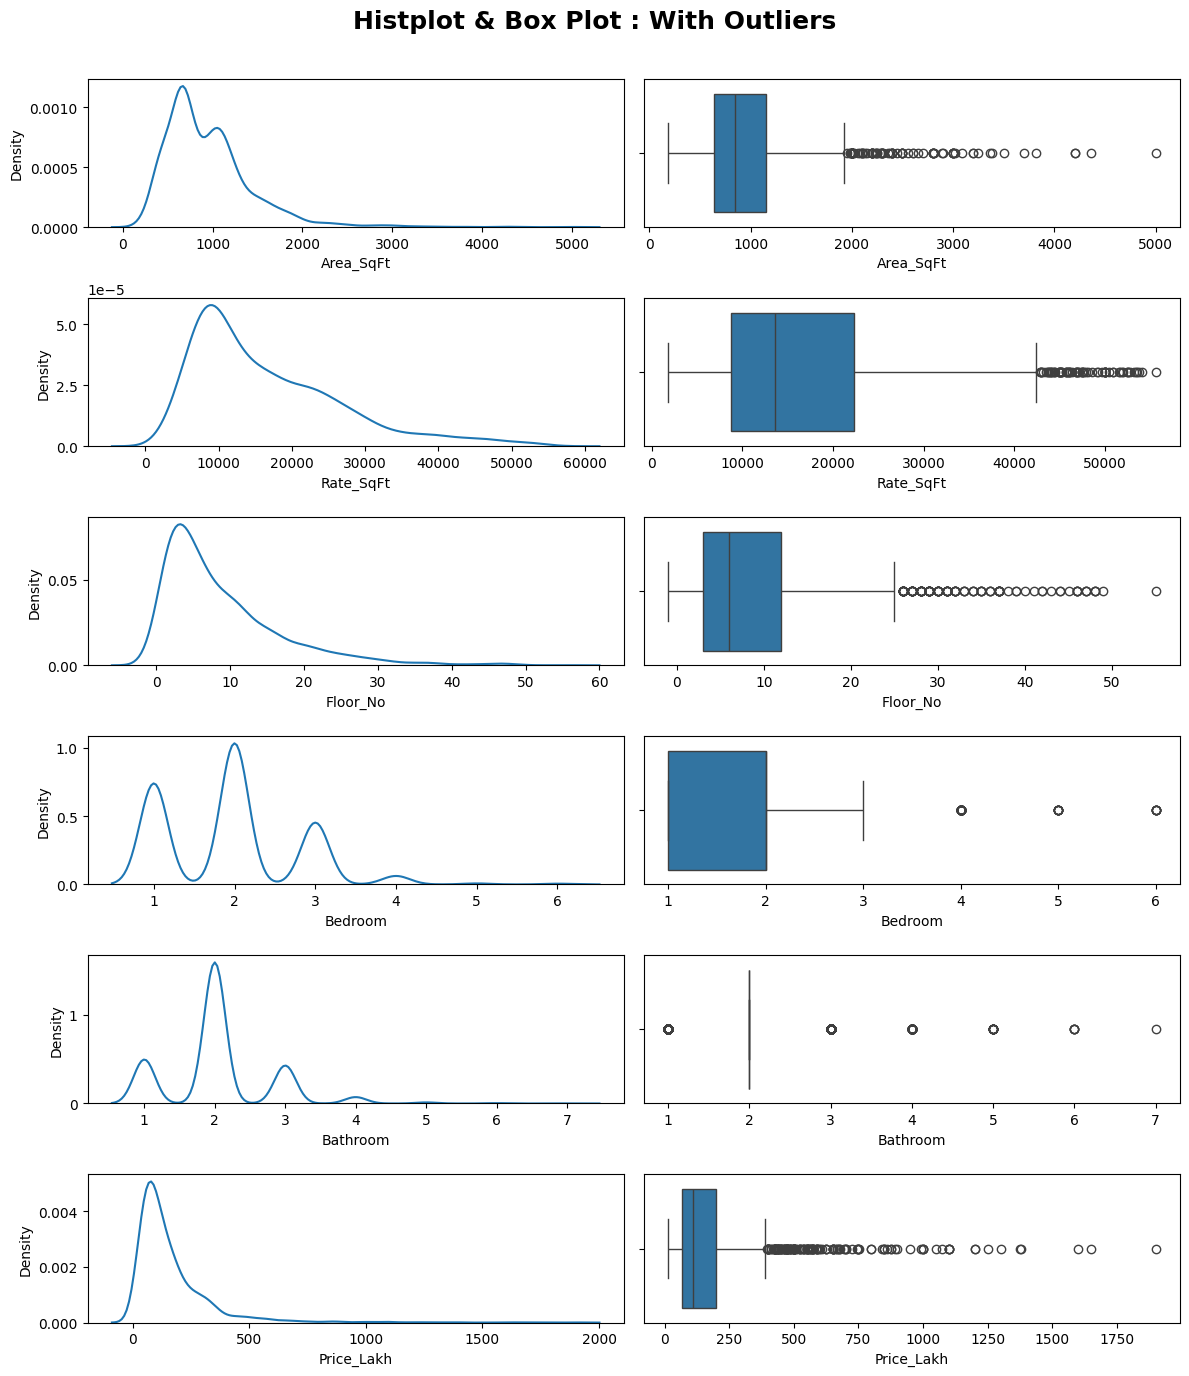

In [22]:
fig, ax = plt.subplots(6,2, figsize = (12,14))

fig.suptitle('Histplot & Box Plot : With Outliers', size = 18, fontweight="bold")
sns.kdeplot(ax= ax[0,0], data = mum_prop, x = 'Area_SqFt')
sns.boxplot(ax= ax[0,1], data = mum_prop, x = 'Area_SqFt')
sns.kdeplot(ax= ax[1,0], data = mum_prop, x = 'Rate_SqFt')
sns.boxplot(ax= ax[1,1], data = mum_prop, x = 'Rate_SqFt')
sns.kdeplot(ax= ax[2,0], data = mum_prop, x = 'Floor_No')
sns.boxplot(ax= ax[2,1], data = mum_prop, x = 'Floor_No')
sns.kdeplot(ax= ax[3,0], data = mum_prop, x = 'Bedroom')
sns.boxplot(ax= ax[3,1], data = mum_prop, x = 'Bedroom')
sns.kdeplot(ax= ax[4,0], data = mum_prop, x = 'Bathroom')
sns.boxplot(ax= ax[4,1], data = mum_prop, x = 'Bathroom')
sns.kdeplot(ax= ax[5,0], data = mum_prop, x = 'Price_Lakh')
sns.boxplot(ax= ax[5,1], data = mum_prop, x = 'Price_Lakh')

pylab.rcParams.update(rcParams)
fig.tight_layout()
fig.subplots_adjust(top=0.93)
plt.show()

#fig.savefig('Outliers', dpi = 500)

## Obeservation :
**Based on data following colums has most outliers & mostly left skewed data:**

- Price_Lakh
- Area_SqFt
- Rate_SqFt
- Floor_No

## 4. Heatmap

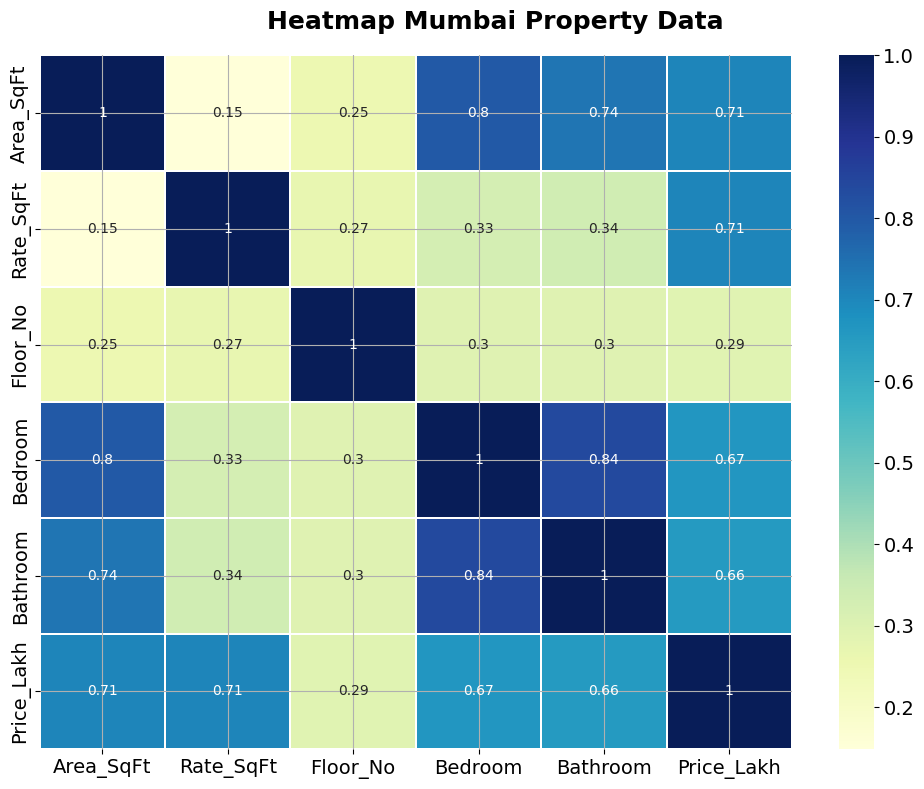

In [28]:
# Ensure only numeric columns are selected for correlation calculation
numeric_columns = mum_prop.select_dtypes(include=[np.number])

# Create the heatmap for the numeric columns' correlation matrix
fig = plt.figure(figsize=(10, 8))

# Plot the heatmap with annotation and specific color map
sns.heatmap(numeric_columns.corr(), annot=True, cmap='YlGnBu', linewidth=.1)

fig.suptitle('Heatmap Mumbai Property Data', fontsize=18, fontweight="bold")

# Update rcParams for aesthetics (if needed)
pylab.rcParams.update({'axes.grid': True, 'figure.figsize': (10, 8)})

# Adjust layout to prevent title or labels from being cut off
fig.tight_layout()

plt.show()

# fig.savefig('Heatmap_Mumbai_Property.png', dpi=250)


## 5. Exploratory Data Analysis
    Convert all variable into following categories

    1 Binary Variables
    2 Ordinal Varibles
    3 Continous Data
    4 Target Variable

### 5.1 Checking for Binary, Oridinal, Continous Data & Target Column

In [29]:
num_columns = mum_prop.describe().columns
categorical_cols = mum_prop.describe(include= 'object').columns

In [30]:
mum_prop.nunique()

Property_Name     894
Location         1294
Region            145
Property_Age        5
Availability        2
Area_Tpye           4
Area_SqFt         696
Rate_SqFt        1990
Floor_No           52
Bedroom             6
Bathroom            7
Price_Lakh        467
dtype: int64

In [31]:
binary_variables = [i  for i in mum_prop.columns  if (len(mum_prop[i].unique()) == 2)]

In [32]:
binary_variables

['Availability']

In [33]:
ordinal_variables=[i for i in mum_prop.columns if ((len(mum_prop[i].unique()) > 2 ) and (len(mum_prop[i].unique()) <= 53))]

In [34]:
ordinal_variables

['Property_Age', 'Area_Tpye', 'Floor_No', 'Bedroom', 'Bathroom']

In [35]:
continous_variable = [i for i in mum_prop.columns if ((len(mum_prop[i].unique()) > 53))]
continous_variable = continous_variable[3:-1] # Remove Price and Location from data

In [36]:
continous_variable

['Area_SqFt', 'Rate_SqFt']

In [37]:
target_variable = 'Price_Lakh'

In [38]:
target_variable

'Price_Lakh'

## 6. Binary Variable

In [39]:
print(binary_variables)
print('Element in binary category :', len(binary_variables))

['Availability']
Element in binary category : 1


### 6.1 Availability Count

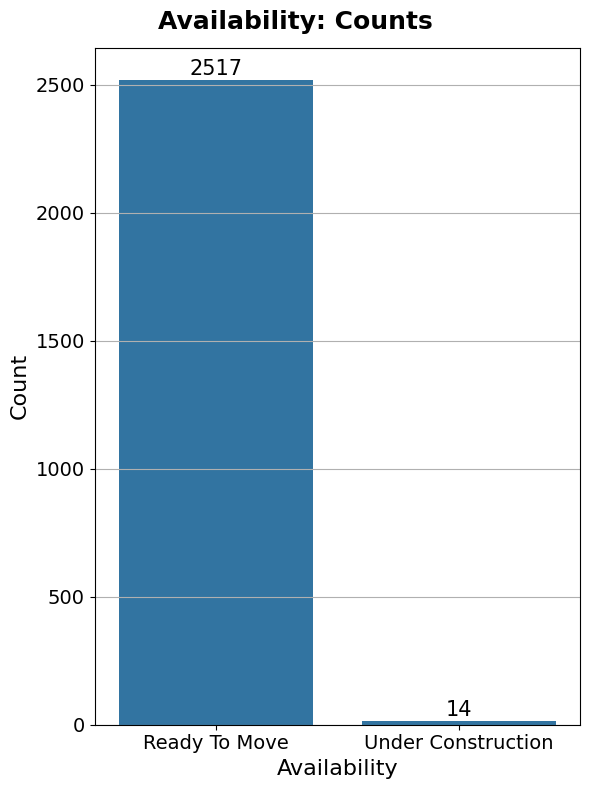

In [47]:
# Get the value counts for the 'Availability' column
availability_counts = mum_prop['Availability'].value_counts()

# Create the figure for the barplot
fig = plt.figure(figsize=(6, 8))

# Plot the barplot using value_counts() for x and y
plot = sns.barplot(x=availability_counts.index, y=availability_counts.values)

# Annotate the bars with their values
for bar in plot.patches:
    plot.annotate(
        format(bar.get_height(), '.0f'),
        (bar.get_x() + bar.get_width() / 2, bar.get_height()),
        ha='center', va='center', size=15,
        xytext=(0, 8), textcoords='offset points'
    )

# Set the title and axis labels
fig.suptitle('Availability: Counts', fontsize=18, fontweight="bold")
plt.xlabel('Availability')
plt.ylabel('Count')

# Update rcParams if needed for aesthetics
pylab.rcParams.update(rcParams)

# Adjust layout and show the plot
fig.tight_layout()
plt.show()

# fig.savefig('Availability_Bar.png', dpi=500)

## 7. Ordinal Variables

In [48]:
print(ordinal_variables)
print('Number of ordinal features is :', len(ordinal_variables))

['Property_Age', 'Area_Tpye', 'Floor_No', 'Bedroom', 'Bathroom']
Number of ordinal features is : 5


### 7.1 Price with respect to Property Age

Property_Name      object
Location           object
Region             object
Property_Age       object
Availability       object
Area_Tpye        category
Area_SqFt         float64
Rate_SqFt           int64
Floor_No            int64
Bedroom             int64
Bathroom            int64
Price_Lakh        float64
Price_Cat        category
dtype: object
         Property_Age  Price_Lakh
0         0 to 1 Year       135.0
1         1 to 5 Year        96.0
2            10+ Year       130.0
3        5 to 10 Year       100.0
4  Under Construction       129.0


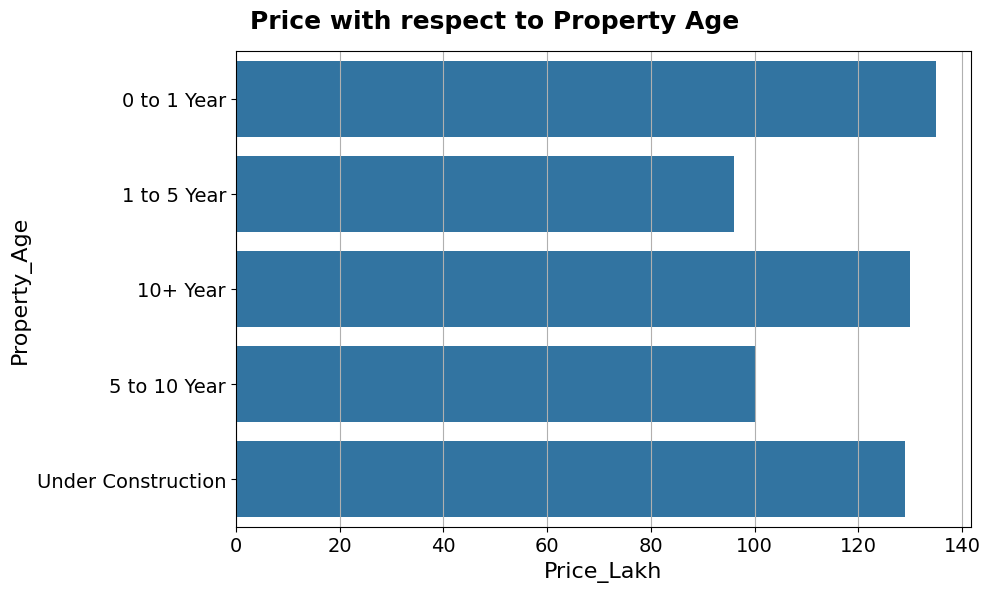

In [171]:
# Convert 'Price_Lakh' to numeric, coercing errors into NaN
mum_prop['Price_Lakh'] = pd.to_numeric(mum_prop['Price_Lakh'], errors='coerce')

# Now check the data types
print(mum_prop.dtypes)

# Remove rows where 'Price_Lakh' is NaN (optional, depending on how you want to handle them)
mum_prop.dropna(subset=['Price_Lakh'], inplace=True)

# Group by 'Property_Age' and compute the median of 'Price_Lakh'
median_price_by_age = mum_prop.groupby('Property_Age')['Price_Lakh'].median().reset_index()

# Print the result to ensure it's correct
print(median_price_by_age)

fig = plt.figure(figsize=(10,6))

# Plot the barplot with the grouped median data
sns.barplot(x='Price_Lakh', y='Property_Age', data=median_price_by_age)

# Set the title and axis labels
fig.suptitle('Price with respect to Property Age', fontsize=18, fontweight="bold")
fig.text(0.9, 0.15,'', fontsize=13, color='blue')

# Update rcParams if needed for aesthetics
pylab.rcParams.update(rcParams)

# Adjust layout and show the plot
fig.tight_layout()
plt.show()


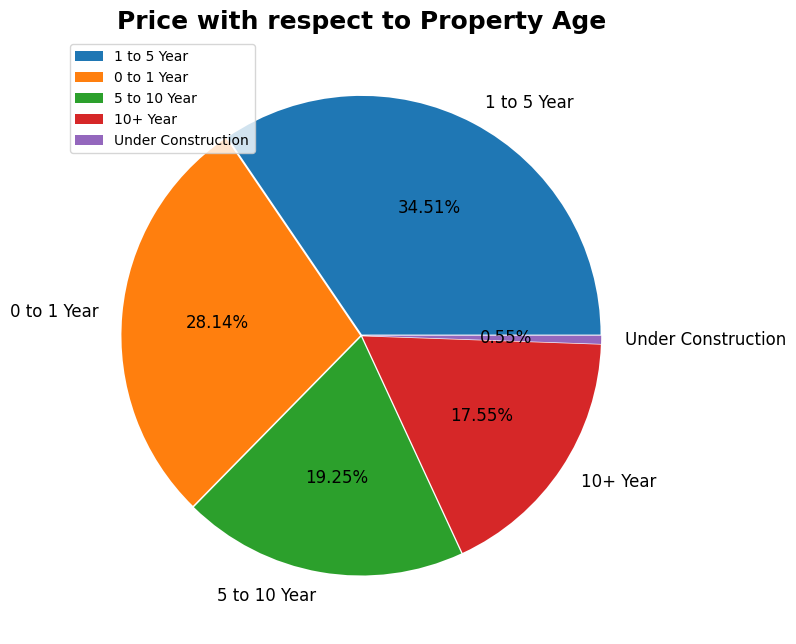

In [ ]:
fig = plt.figure(figsize = (8,8))
plt.pie(mum_prop['Property_Age'].value_counts(),
       labels=['1 to 5 Year','0 to 1 Year','5 to 10 Year','10+ Year','Under Construction'],
       autopct= '%.2f%%', textprops = {'size':'large'},explode = [0.005,0.005,0.005,0.005,0.005])
plt.legend(loc= 'upper left')
plt.title("Price with respect to Property Age", fontsize = 18, fontweight = 'bold')
fig.text(0.9, 0.15,'', fontsize = 13, color ='red')

pylab.rcParams.update(rcParams)
fig.tight_layout()
fig.subplots_adjust(top=0.93)
plt.show()

#fig.savefig('Price_Age_Distribution', dpi = 500)

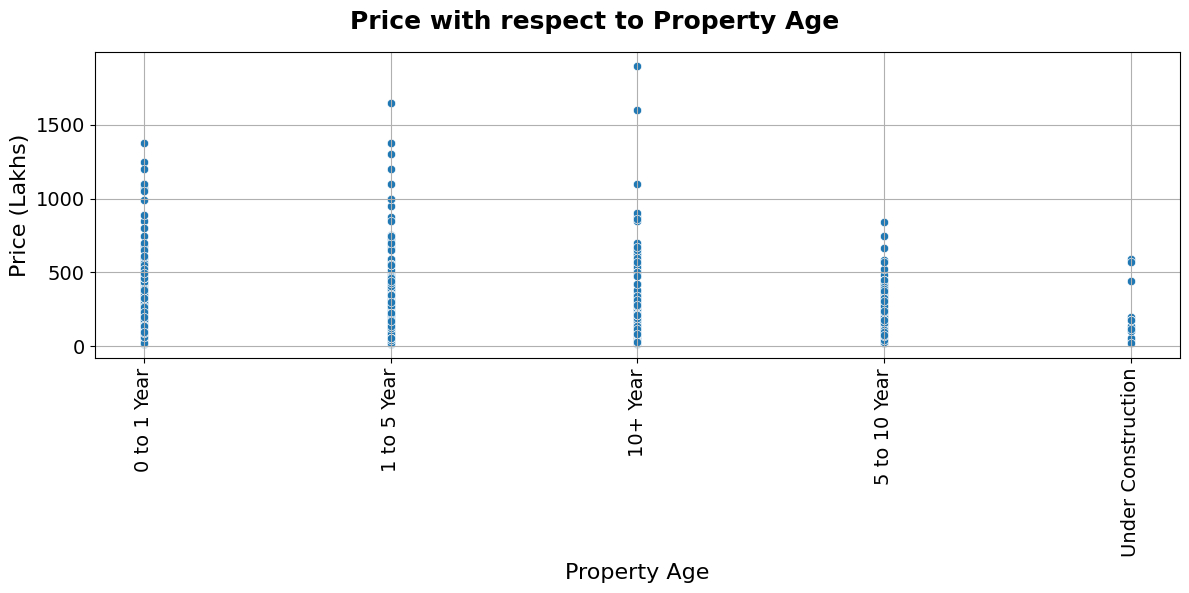

In [59]:
fig = plt.figure(figsize=(12,6))
fig.suptitle('Price with respect to Property Age', size = 18, fontweight="bold")
fig.text(0.9, 0.15, '',fontsize = 13, color ='blue')

sns.scatterplot(data = mum_prop , x = mum_prop['Property_Age'], y = mum_prop['Price_Lakh'])
plt.xlabel("Property Age", size=16)
plt.ylabel("Price (Lakhs)", size=16)
plt.xticks(rotation=90)

pylab.rcParams.update(rcParams)
fig.tight_layout()
plt.show()

#fig.savefig('Property_Age_Price_Scatter', dpi = 500)

### 7.2 Price with respect to Bed & Bath

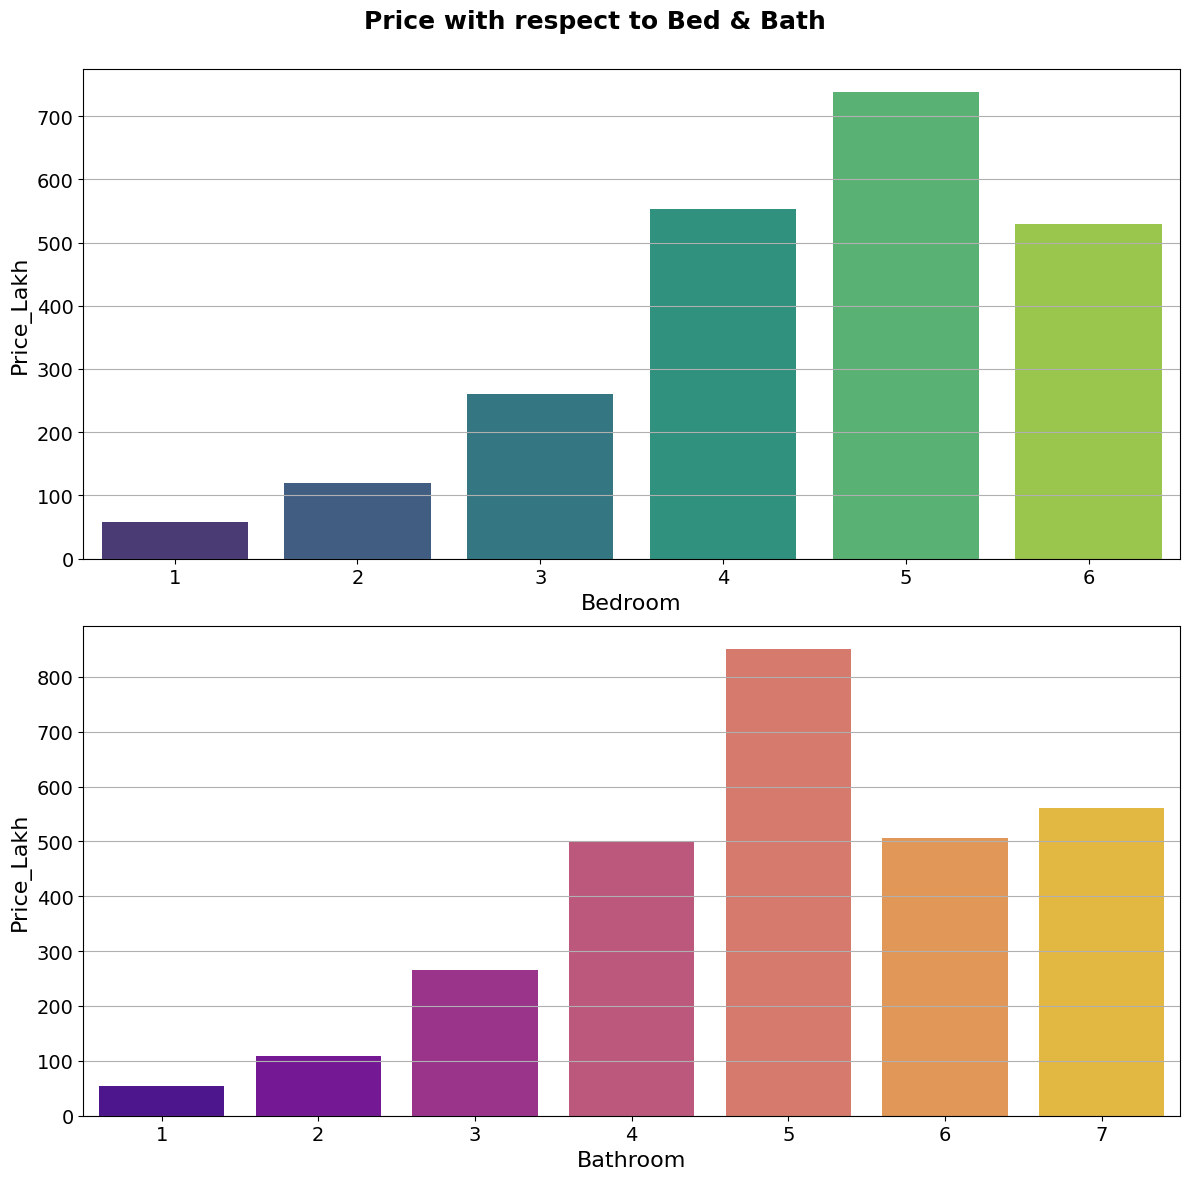

In [175]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure Bedroom and Bathroom columns are numeric (convert non-numeric to NaN)
mum_prop['Bedroom'] = pd.to_numeric(mum_prop['Bedroom'], errors='coerce')
mum_prop['Bathroom'] = pd.to_numeric(mum_prop['Bathroom'], errors='coerce')

# Group by Bedroom and Bathroom to calculate the median price
bedroom_median = mum_prop.groupby('Bedroom')['Price_Lakh'].median().reset_index()
bathroom_median = mum_prop.groupby('Bathroom')['Price_Lakh'].median().reset_index()

# Create subplots
fig, ax = plt.subplots(2, 1, figsize=(12, 12))

# Plot for Bedroom vs Price with different colors
sns.barplot(ax=ax[0], data=bedroom_median, x='Bedroom', y='Price_Lakh', palette='viridis')  # Using the 'viridis' palette

# Plot for Bathroom vs Price with different colors
sns.barplot(ax=ax[1], data=bathroom_median, x='Bathroom', y='Price_Lakh', palette='plasma')  # Using the 'plasma' palette

# Set title and custom text
fig.suptitle('Price with respect to Bed & Bath', fontsize=18, fontweight="bold")
fig.text(0.9, 0.15, '', fontsize=13, color='black')

# Tight layout for spacing
fig.tight_layout()
fig.subplots_adjust(top=0.93)

# Show the plot
plt.show()

fig.savefig('BednBath_Price_Bar', dpi = 500)


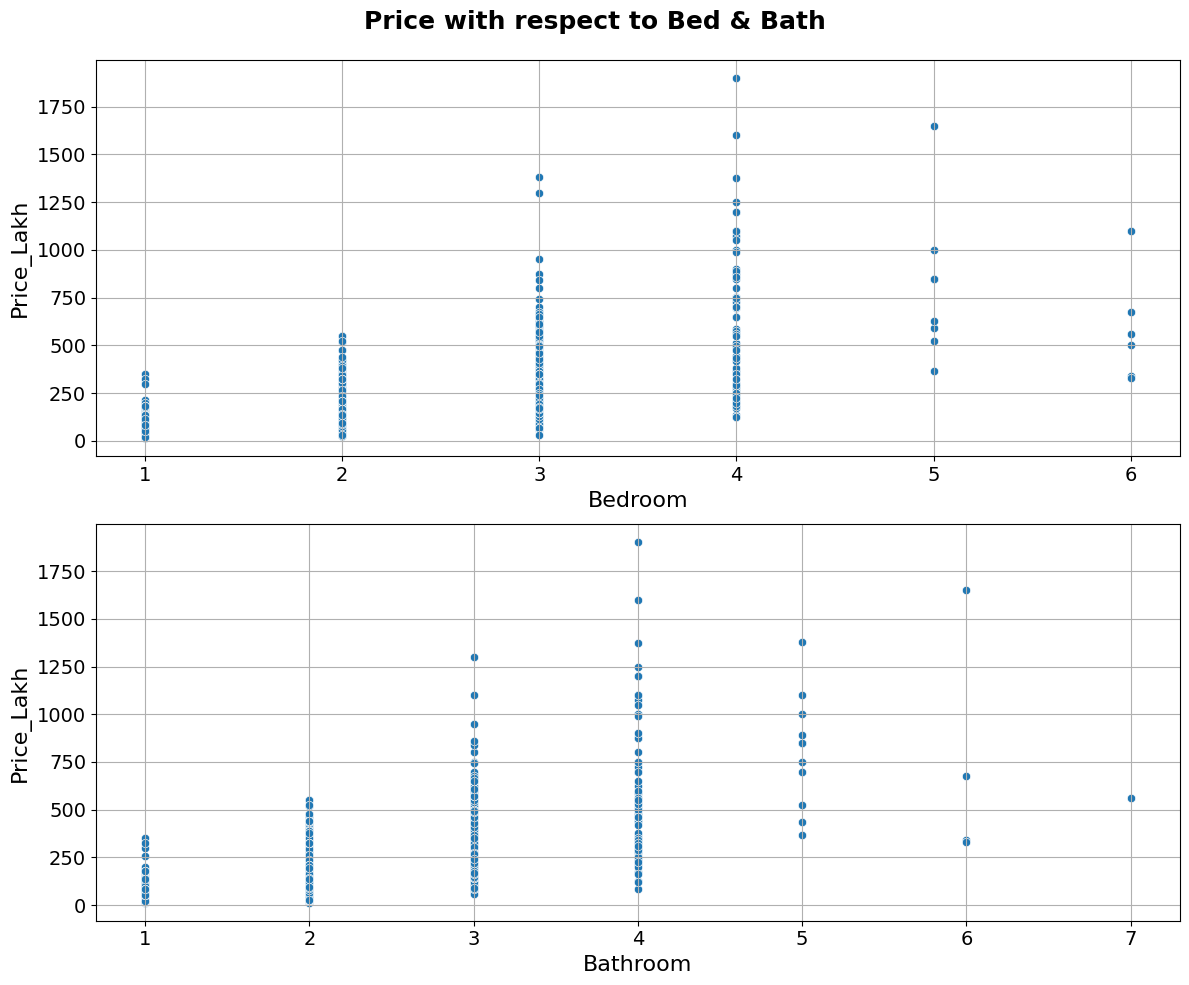

In [76]:
fig, ax = plt.subplots(2,1, figsize = (12,10))

sns.scatterplot(ax= ax[0], data = mum_prop , x = mum_prop['Bedroom'], y = mum_prop['Price_Lakh'])
sns.scatterplot(ax= ax[1], data = mum_prop , x = mum_prop['Bathroom'], y = mum_prop['Price_Lakh'])
fig.suptitle('Price with respect to Bed & Bath', size = 18, fontweight="bold")
fig.text(0.9, 0.15, '', fontsize = 13, color ='blue')

pylab.rcParams.update(rcParams)
fig.tight_layout()
fig.subplots_adjust(top=0.93)
plt.show()

#fig.savefig('Bed_Bath_Price_Scatter', dpi = 500)

### 7.3 Area Type Distribution

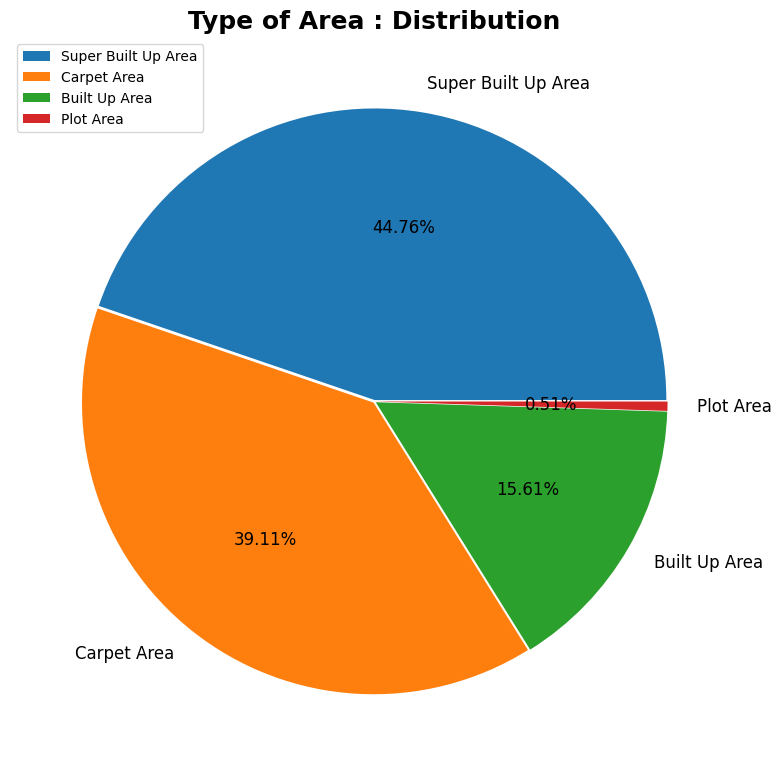

In [77]:
fig = plt.figure(figsize = (8,8))
plt.pie(mum_prop['Area_Tpye'].value_counts(),
       labels=['Super Built Up Area','Carpet Area','Built Up Area','Plot Area'],
       autopct= '%.2f%%', textprops = {'size':'large'},explode = [0.005,0.005,0.005,0.005])
plt.legend(loc= 'upper left')
plt.title("Type of Area : Distribution", fontsize = 18, fontweight = 'bold')
fig.text(0.9, 0.15, '', fontsize = 13, color ='red')

pylab.rcParams.update(rcParams)
fig.tight_layout()
fig.subplots_adjust(top=0.93)
plt.show()

#fig.savefig('Area_Type_Distribution', dpi = 500)

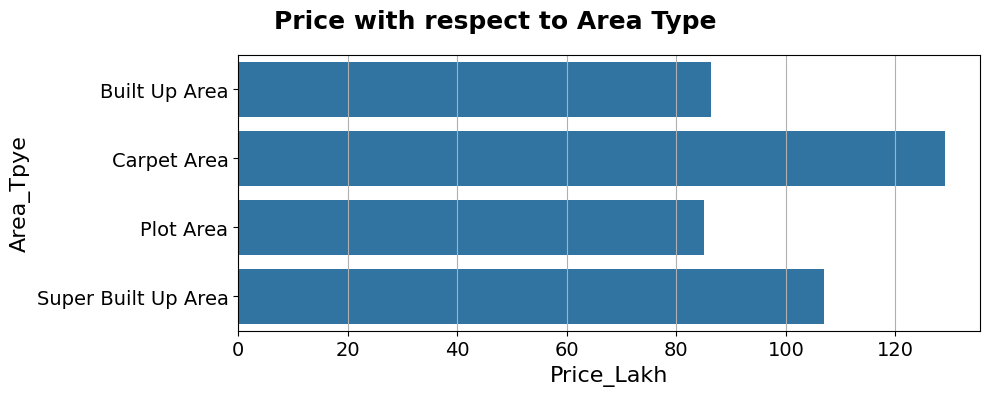

In [83]:
# Ensure Area_Tpye is treated as categorical
mum_prop['Area_Tpye'] = mum_prop['Area_Tpye'].astype('category')

# Group by 'Area_Tpye' and calculate median of 'Price_Lakh'
area_median = mum_prop.groupby('Area_Tpye')['Price_Lakh'].median().reset_index()

# Create the plot
fig = plt.figure(figsize=(10, 4))

# Use seaborn barplot
sns.barplot(data=area_median, x='Price_Lakh', y='Area_Tpye')

# Add title and custom text
fig.suptitle('Price with respect to Area Type', fontsize=18, fontweight="bold")
fig.text(0.9, 0.15, '', fontsize=13, color='red')

# Update layout and show plot
fig.tight_layout()
plt.show()

# fig.savefig('Area_Type_Price_Bar', dpi=500)


### 7.4 Price with respect to Floor Numbers

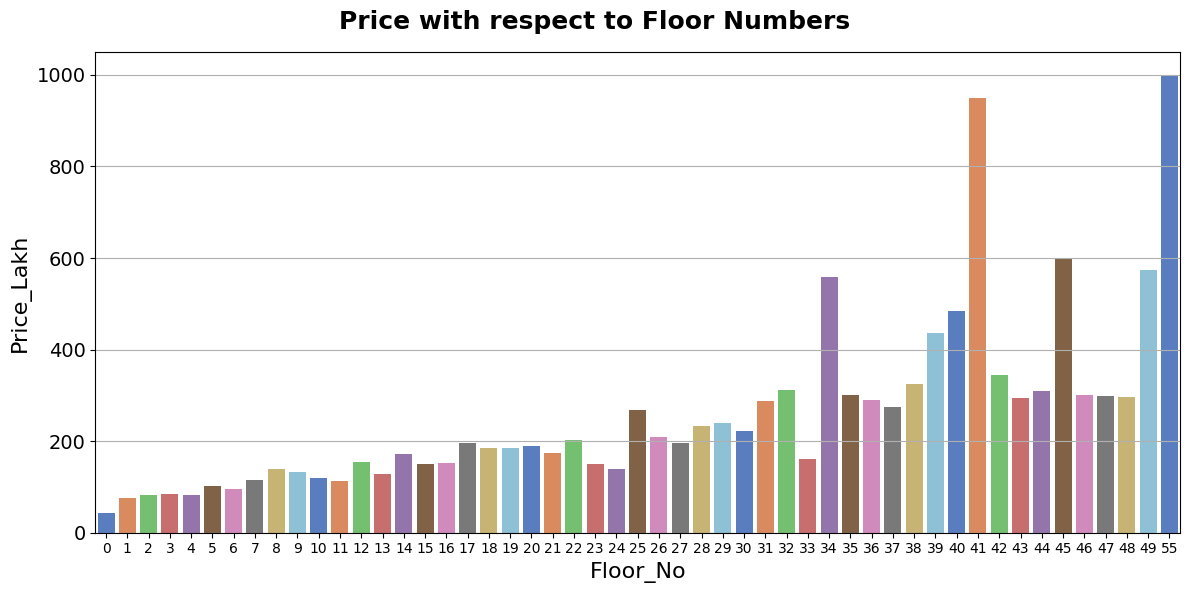

In [191]:
# Clean up 'Floor_No' column to ensure no invalid values (e.g., negative numbers or NaNs)
mum_prop = mum_prop[mum_prop['Floor_No'] >= 0]  # Filter out invalid floor numbers (negative values)
mum_prop.dropna(subset=['Floor_No', 'Price_Lakh'], inplace=True)  # Drop rows with missing values in Floor_No or Price_Lakh

# Group by 'Floor_No' and calculate the median of 'Price_Lakh'
floor_median = mum_prop.groupby('Floor_No')['Price_Lakh'].median().reset_index()

# Create the figure
fig = plt.figure(figsize=(12, 6))

# Create the bar plot using seaborn
sns.barplot(data=floor_median, x='Floor_No', y='Price_Lakh', palette='muted')

# Set the title and add custom text
fig.suptitle('Price with respect to Floor Numbers', fontsize=18, fontweight="bold")
fig.text(0.9, 0.15, '', fontsize=13, color='blue')  # Adding text on the figure

# Update plot aesthetics
params = {'xtick.labelsize': '12', 'ytick.labelsize': '14', 'axes.labelsize': '16'}
pylab.rcParams.update(params)

# Adjust layout to avoid overlap and display the plot
fig.tight_layout()
plt.show()

fig.savefig('Property_Floor_Numbers_Bar', dpi=500)


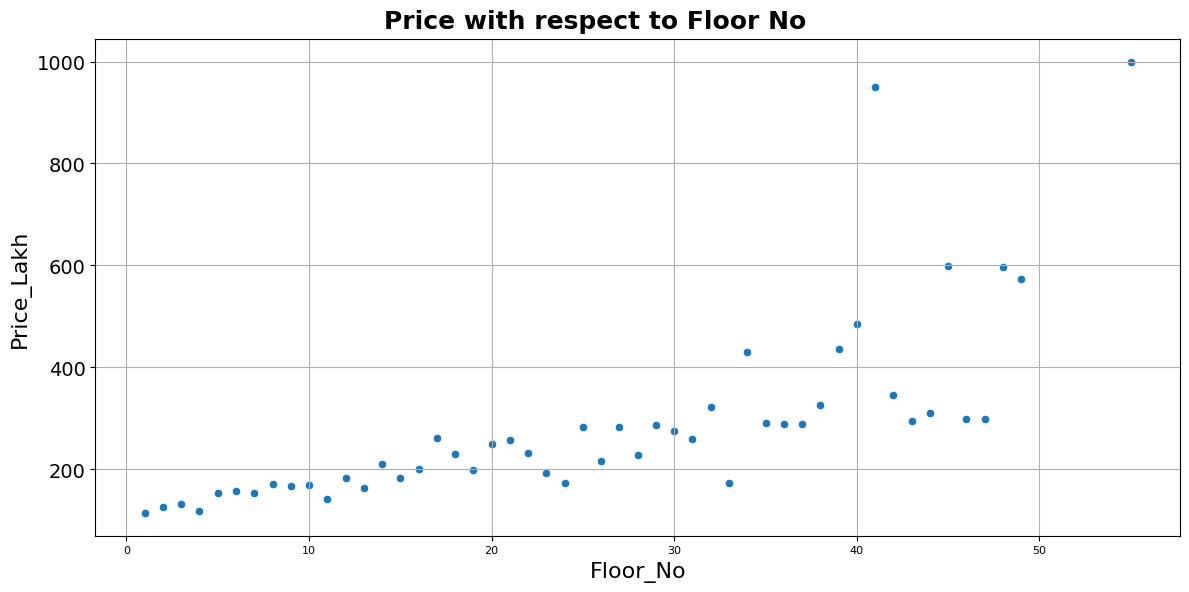

In [101]:
fig = plt.figure(figsize=(12,6))

group_full = mum_prop.groupby('Floor_No')['Price_Lakh'].mean()
group = group_full.reset_index()
group = group[group['Floor_No'] > 0]
group = group[group['Floor_No'] < 60]

x = group['Floor_No']
y = group['Price_Lakh']
fig.suptitle('Price with respect to Floor No', fontsize= 18 , fontweight='bold')
fig.text(0.9, 0.15, '', fontsize = 13, color ='blue')
sns.scatterplot(x=x, y=y)

pylab.rcParams.update(rcParams)
fig.tight_layout()
fig.subplots_adjust(top=0.93)
plt.show()

#fig.savefig('FloorNo_Price_Scatter', dpi = 500)

### From above visualization we have concluded following points for higher Price.

   1. As number of bedroom increased price also has incresed
   2. As floor number goes higher price also increased
   3. 4 BHK and 5 BHK price higher
   4. Plot Area criteria is higher price
   5. Upcoming New Project prices are higher

## 8. Continous Variables

In [102]:
for i in continous_variable:
    print("Length of", i,":", len(mum_prop[i].unique()))

Length of Area_SqFt : 696
Length of Rate_SqFt : 1990


### 8.1 Price with respect to SqFt Area

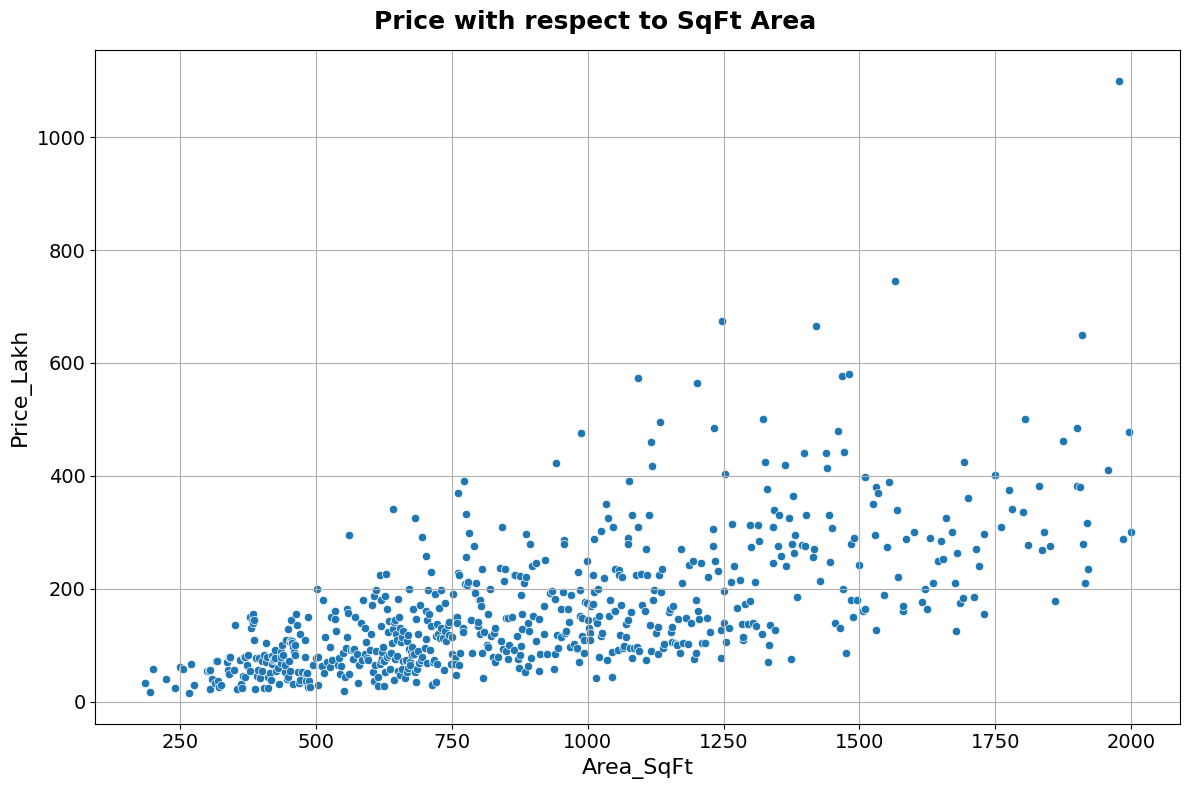

In [193]:
fig = plt.figure(figsize=(12,8))

group_full = mum_prop.groupby('Area_SqFt')['Price_Lakh'].mean()
group = group_full.reset_index()
group = group[group['Area_SqFt'] > 0]
group = group[group['Area_SqFt'] < 2000]

x = group['Area_SqFt']
y = group['Price_Lakh']
fig.suptitle('Price with respect to SqFt Area', fontsize= 18 , fontweight='bold')
fig.text(0.9, 0.15, '', fontsize = 13, color ='black')
sns.scatterplot(x=x, y=y)

pylab.rcParams.update(rcParams)
fig.tight_layout()
fig.subplots_adjust(top=0.93)
plt.show()

#fig.savefig('SqFt_Area_Price_Scatter', dpi = 500)

### 8.2 Data visualization for 'Rate_SqFt' for Location 'Mira Road'
**Note here its normal distribuation of data so outlier removal using stad deviation and mean works perfectly here**

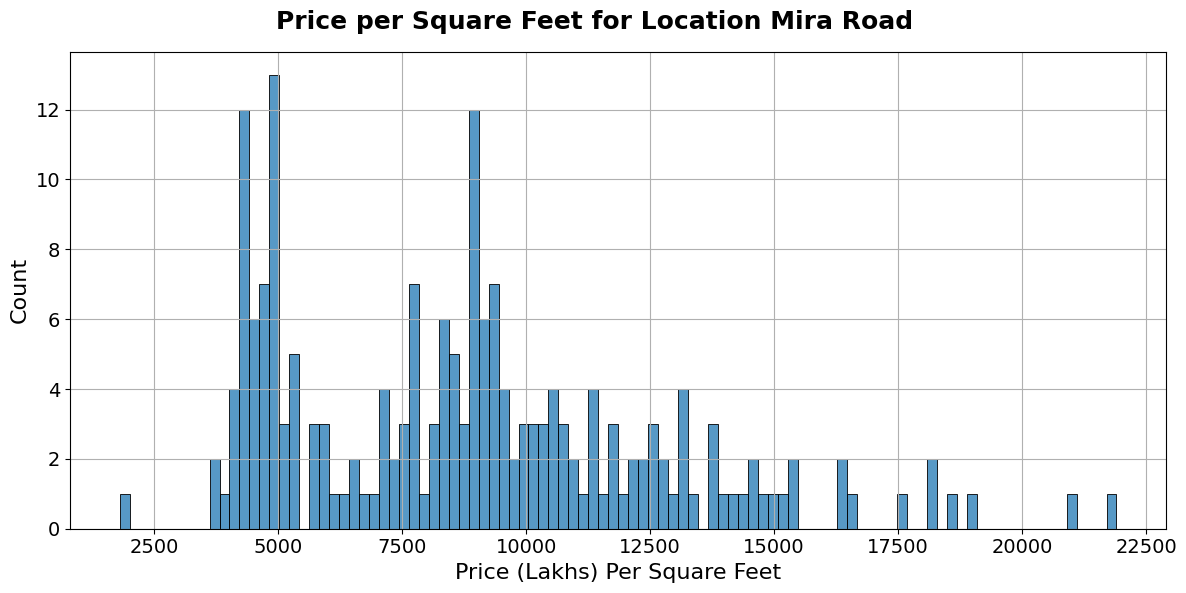

In [106]:
fig = plt.figure(figsize=(12,6))
fig.suptitle('Price per Square Feet for Location Mira Road', size = 18, fontweight="bold")
fig.text(0.9, 0.15, '', fontsize = 13, color ='red')

sns.histplot(mum_prop[mum_prop.Region == "Mira Road"].Rate_SqFt ,bins=100)
plt.xlabel("Price (Lakhs) Per Square Feet")
plt.ylabel("Count")

pylab.rcParams.update(rcParams)
fig.tight_layout()
plt.show()

#fig.savefig('Rate_SqFt_Bar', dpi = 500)

## 9. Target Varible

In [107]:
mum_prop['Price_Cat'] = pd.cut(x = mum_prop['Price_Lakh'], bins = [13,70,190,16500], labels=['Low','Medium','High'], right = False)
mum_prop.Price_Cat.value_counts()

Price_Cat
Medium    1186
High       674
Low        670
Name: count, dtype: int64

### Checking for Imbalanced or balanced dataset with regards to the Target

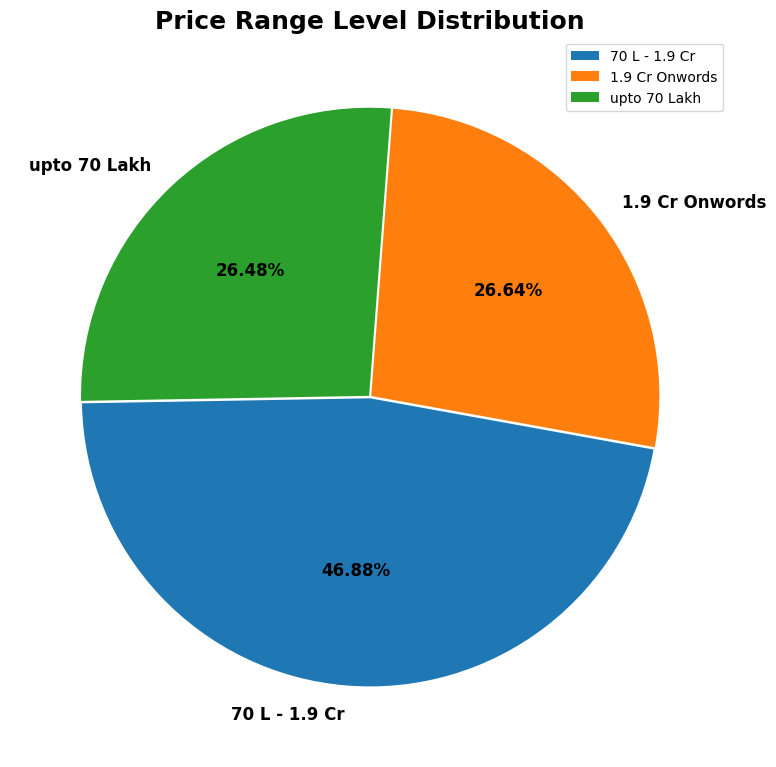

In [ ]:
fig = plt.figure(figsize = (8,8))

plt.pie(mum_prop['Price_Cat'].value_counts(), labels= ['70 L - 1.9 Cr','1.9 Cr Onwords','upto 70 Lakh'],
        explode= [0.005,0.005,0.005], autopct= '%.2f%%', startangle= 181, textprops= {'size':'large','fontweight':'bold'})
plt.legend(loc= 'upper right')
plt.title("Price Range Level Distribution", fontsize = 18, fontweight = 'bold')
fig.text(0.9, 0.15, '', fontsize = 13, color ='red')

pylab.rcParams.update(rcParams)
fig.tight_layout()
fig.subplots_adjust(top=0.93)
plt.show()

#fig.savefig('Price_Range_Distribution', dpi = 500)

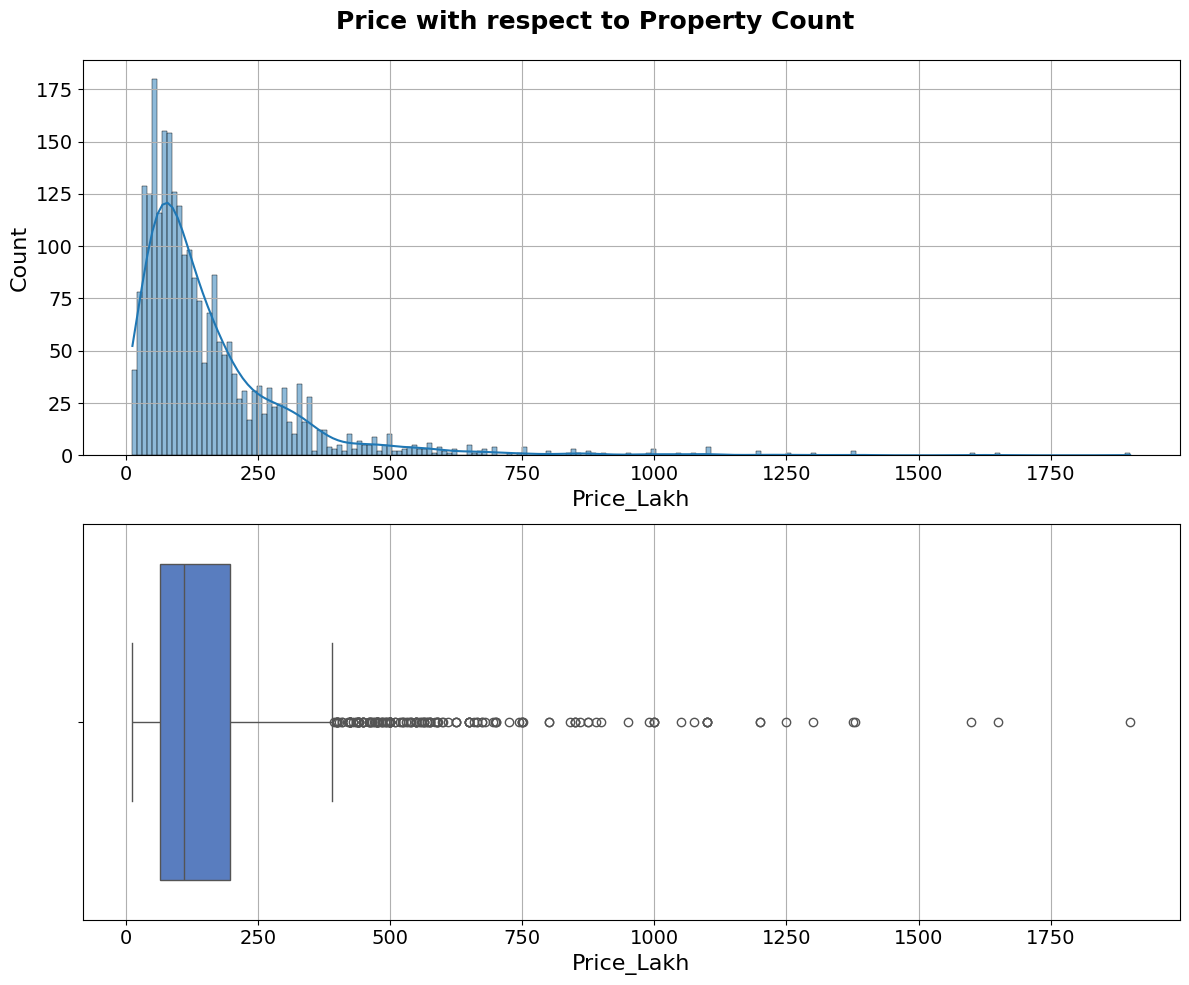

In [117]:
fig, ax = plt.subplots(2,1, figsize = (12,10))

fig.suptitle('Price with respect to Property Count', size = 18, fontweight="bold")
fig.text(0.9, 0.15, '', fontsize = 13, color ='red')
sns.histplot(ax= ax[0],data=mum_prop["Price_Lakh"], kde =  True, bins = 200)
sns.boxplot(ax= ax[1], data=mum_prop["Price_Lakh"], orient="h", palette='muted')

pylab.rcParams.update(rcParams)
fig.tight_layout()
fig.subplots_adjust(top=0.93)
plt.show()

#fig.savefig('Price_Count_Bar', dpi = 500)

## 10. Bar plot Region wise Price

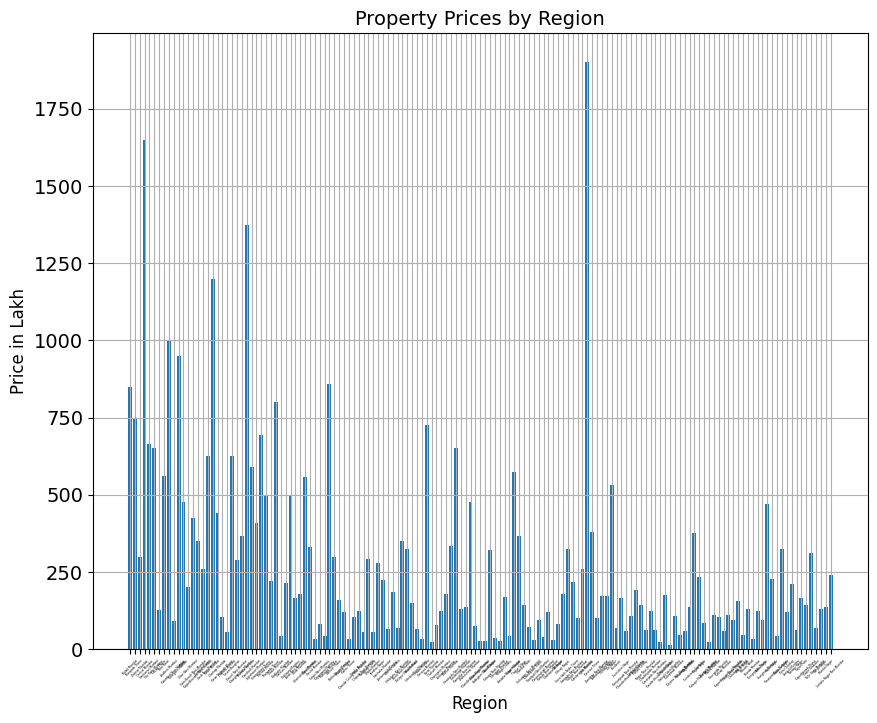

In [148]:
import matplotlib.pyplot as plt

x = mum_prop['Region']
y = mum_prop['Price_Lakh']

plt.bar(x, y)
plt.xlabel('Region', fontsize=12)  # Resize x-axis label text
plt.ylabel('Price in Lakh', fontsize=12)  # Resize y-axis label text
plt.title('Property Prices by Region', fontsize=14)  # Resize title text

# Resize the x-axis labels (font size)
plt.xticks(rotation=45, fontsize=2)  # Resize x-axis ticks

plt.show()


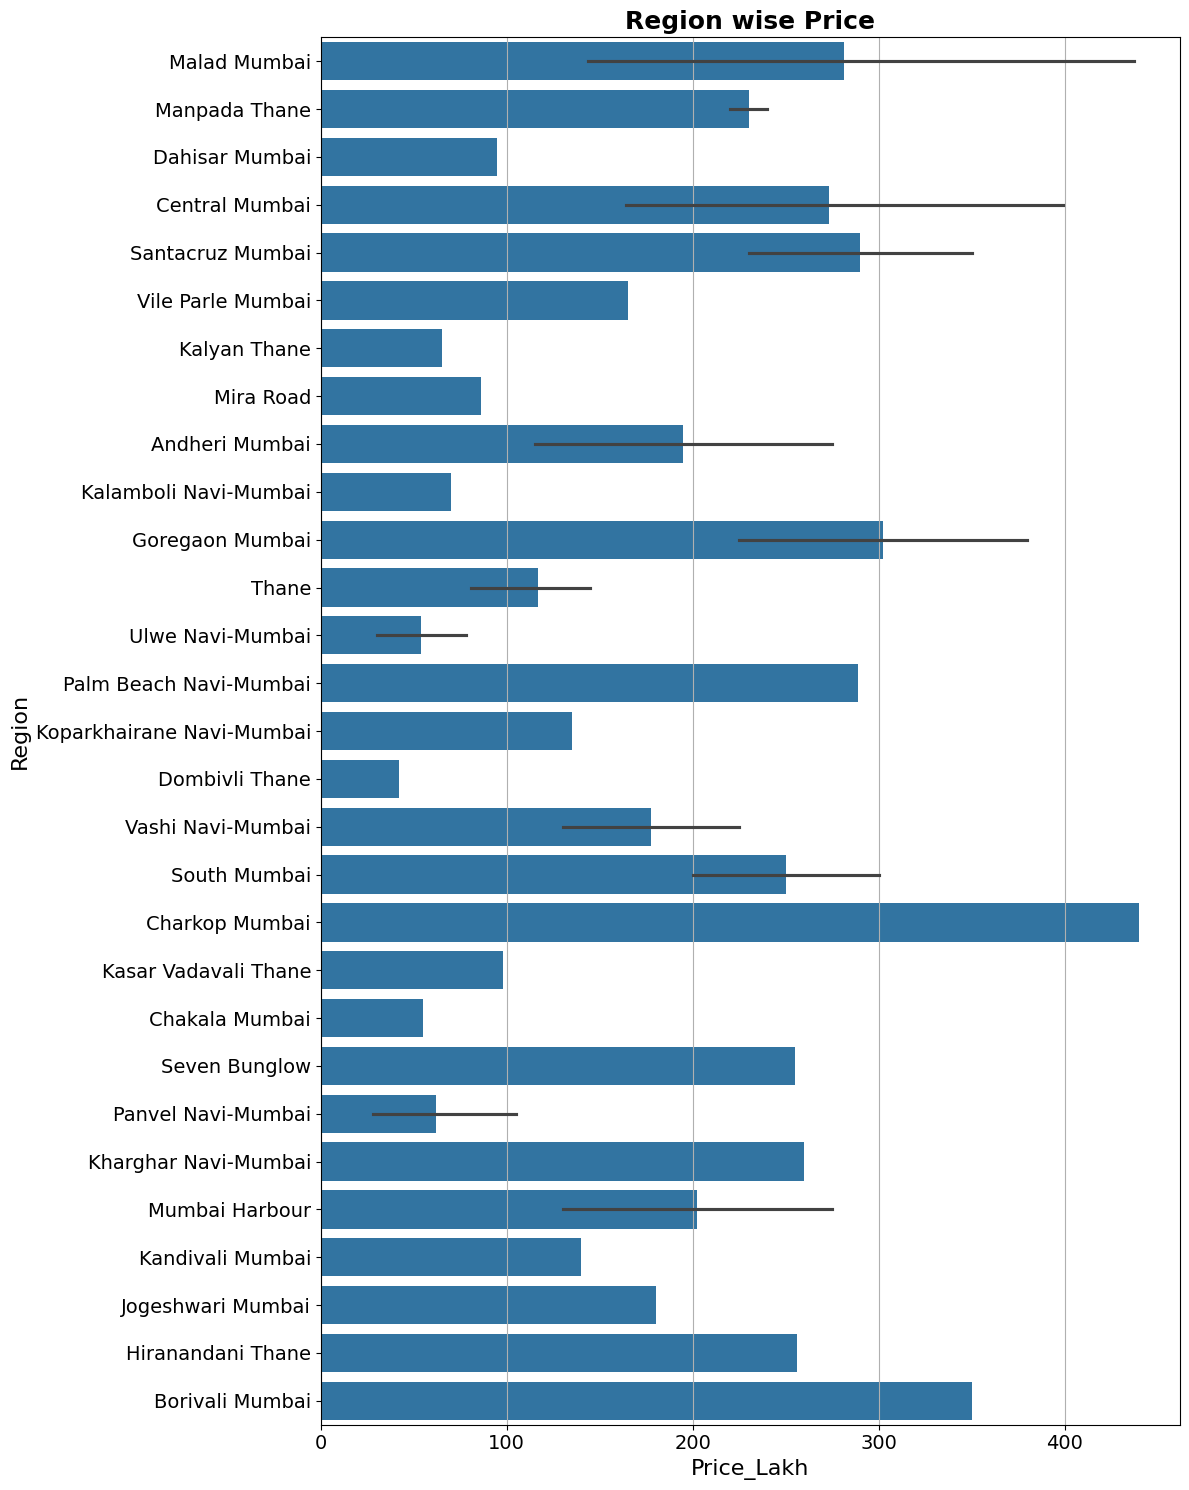

In [152]:
fig  = plt.figure(figsize=(12,15))
sns.barplot(x='Price_Lakh',y='Region',data=mum_prop.head(50))
plt.title('Region wise Price', size = 18, fontweight="bold")
fig.text(0.9, 0.15, '', fontsize = 13, color ='red')

pylab.rcParams.update(rcParams)
fig.tight_layout()
plt.show()

#fig.savefig('Region_wise_Price_Bar', dpi = 500)

## 11. Check for a given Region how does the 2 BHK and 3 BHK Property Prices look like

In [153]:
mum_prop.Region.nunique()

145

In [ ]:
def plot_scatter_chart1(mum_prop,Region):
    fig  = plt.figure(figsize=(10,7))
    bhk2 = mum_prop[(mum_prop.Region==Region) & (mum_prop.Bedroom==2)]
    bhk3 = mum_prop[(mum_prop.Region==Region) & (mum_prop.Bedroom==3)]
    bhk4 = mum_prop[(mum_prop.Region==Region) & (mum_prop.Bedroom==4)]
    plt.rcParams['figure.figsize'] = (14,12)
    sns.scatterplot(x=bhk2.Area_SqFt,y=bhk2.Price_Lakh,marker='p',color='blue',label='2 BHK',s=100)
    sns.scatterplot(x=bhk3.Area_SqFt,y=bhk3.Price_Lakh,marker='o',color='red',label='3 BHK',s=100)
    sns.scatterplot(x=bhk4.Area_SqFt,y=bhk4.Price_Lakh,marker='*',color='green',label='4 BHK',s=300)
    plt.xlabel("Total Square Feet Area", )
    plt.ylabel("Price (Lakhs Indian Rupees)")
    plt.title(Region, fontsize = 18, fontweight="bold")
    fig.text(0.9, 0.15, '', fontsize = 13, color ='blue')
    
      
    pylab.rcParams.update(rcParams)
    plt.legend(fontsize = 12)
    fig.tight_layout()
    fig.subplots_adjust(top=0.90)
    
    #fig.savefig(Region, dpi = 500)

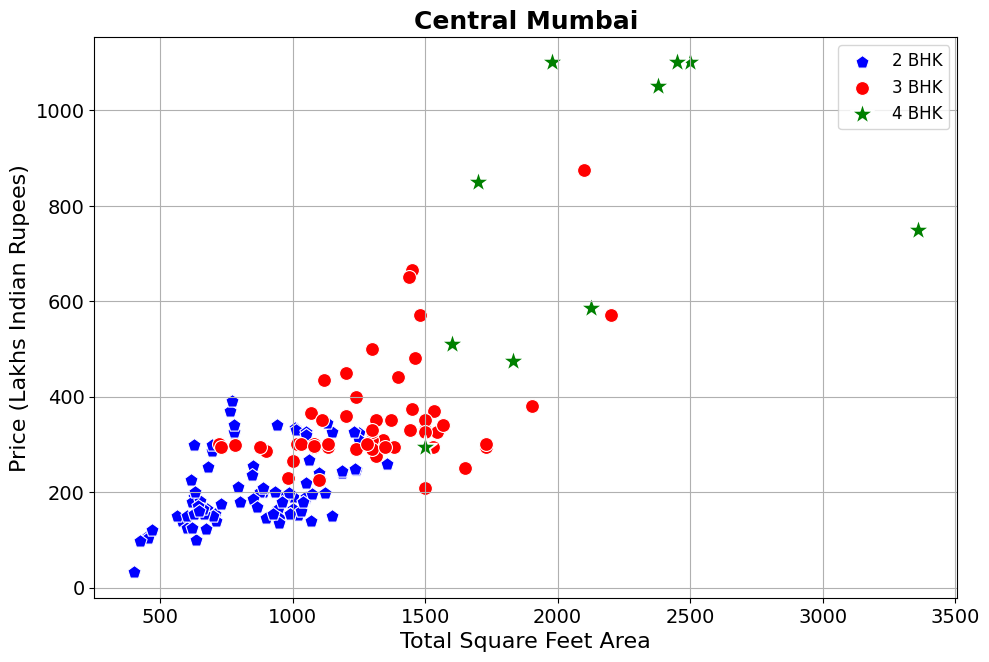

In [178]:
plot_scatter_chart1(mum_prop,"Central Mumbai")

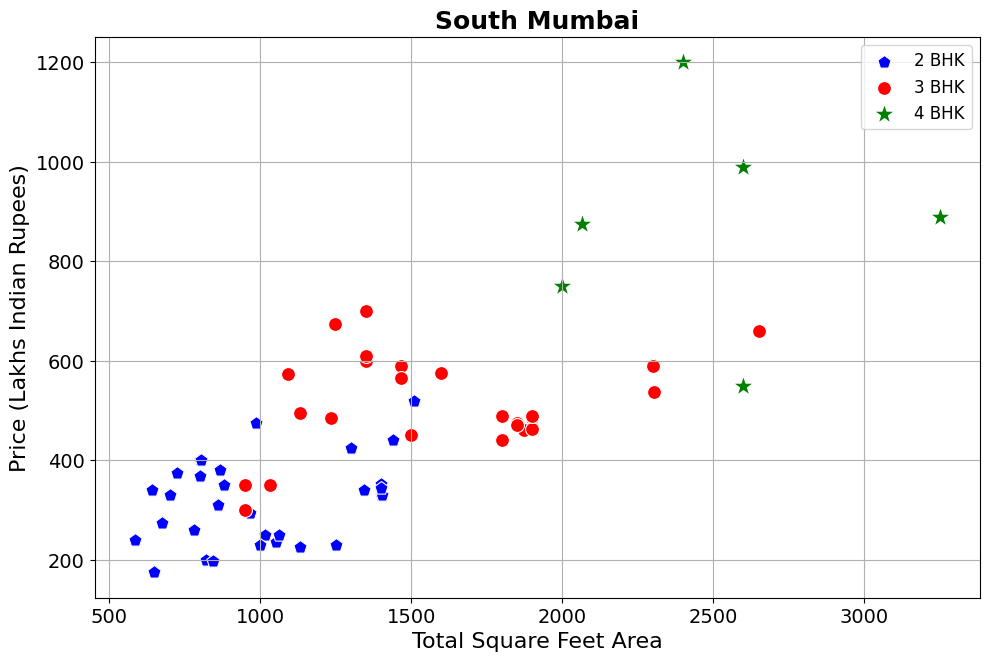

In [195]:
plot_scatter_chart1(mum_prop,"South Mumbai")

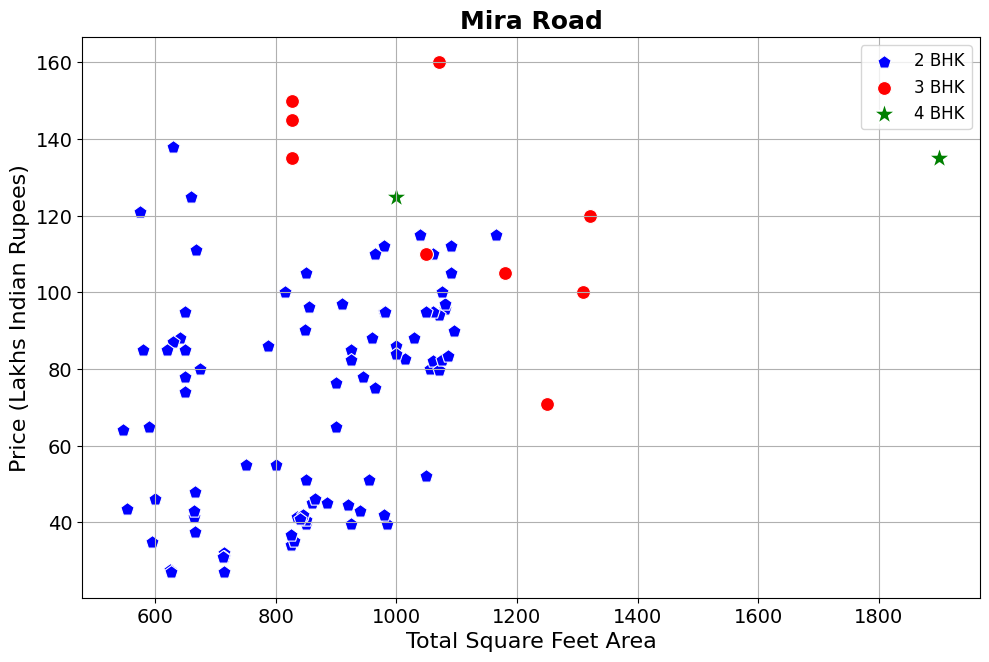

In [164]:
plot_scatter_chart1(mum_prop,"Mira Road")

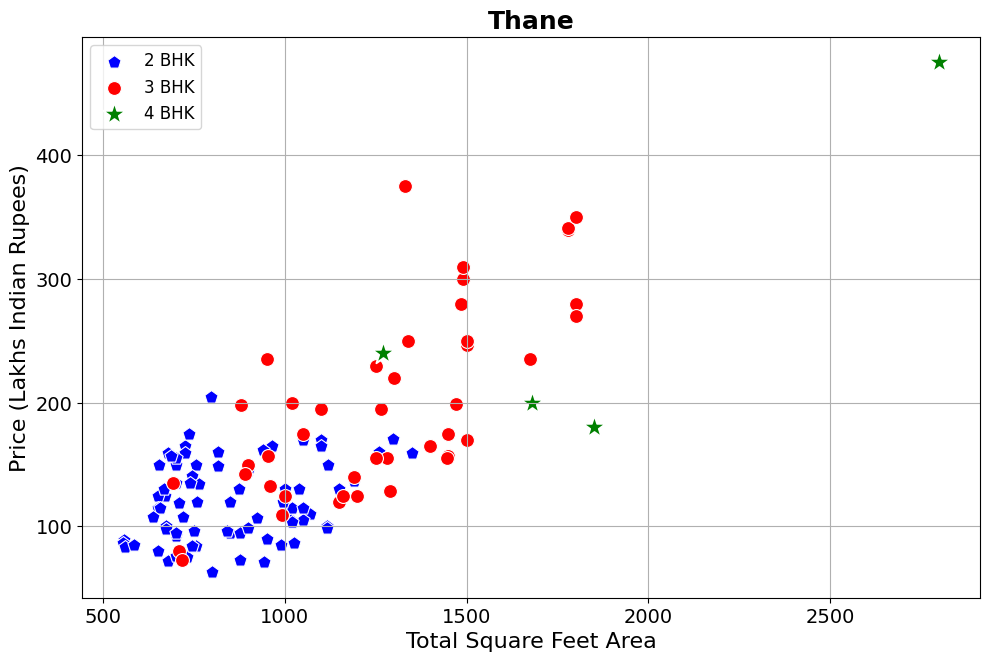

In [194]:
plot_scatter_chart1(mum_prop,"Thane")

## 12. Location Map (Geocoders)

In [168]:
df = pd.read_csv('Datasets/Map_Location.csv')

lat   = list(df['Latitude'])
lon   = list(df['Longitude'])
name  = list(df['Property_Name'])
add   = list(df['Location'])
price = list(df['Price'])
age   = list(df['Property_Age'])
avail = list(df['Availability'])
rate  = list(df['Rate_SqFt'])

gmap  = folium.Map(location=[19.15940, 73.07068], zoom_start=11)
fg    = folium.FeatureGroup(name="My Map").add_to(gmap)

In [169]:
for lat,lon,name,add,price,age,avail,rate in zip(lat,lon,name,add,price,age,avail,rate):
    html = f"""<p style="color:green" > Property Name : {name}<p/>
               <p style="color:green" > Address : {add}<p/>
               <p style="color:red" > Price : {price}<p/>
               <p style="color:red" > Rate per SqFt : {rate}<p/>
               <p style="color:blue" > Property Age : {age}<p/>
               <p style="color:blue" > Availability : {avail}<p/>
            """
    iframe = folium.IFrame(html, width=250, height=270)
    popup  = folium.Popup(iframe, max_width=300)
    marker = folium.Marker([lat,lon], popup=(popup)).add_to(gmap)
    gmap.add_child(marker)

gmap.add_child(fg)
#gmap.save("mumbai_property.html")

# The End !!